In [3]:
import os
import time

import pickle 
import numpy as np

# with open( "./exp_folder/exp180.pkl", "rb" ) as file:
#     o = pickle.load( file )

with open( "./agr.pkl", "rb" ) as file:
    o = pickle.load( file )

maxbeta =0
for oo in o:
    if oo["beta"] > maxbeta:
        maxbeta = oo["beta"]

print( maxbeta )
# o

112


In [4]:
o

[{'kyb': (100, 3329, 3, 1),
  'beta': 17,
  'time': 51.50188788026571,
  'projinfo': {2: {'i': 61,
    'projfact': 11.099246961928236,
    'projsec': 10.84140647125732},
   3: {'i': 62, 'projfact': 12.49406107747212, 'projsec': 11.952386542363902},
   4: {'i': 62, 'projfact': 12.49406107747212, 'projsec': 11.952386542363902},
   5: {'i': 61, 'projfact': 11.156706642025327, 'projsec': 10.983882816992622},
   6: {'i': 61, 'projfact': 11.156706642025327, 'projsec': 10.983882816992622},
   7: {'i': 58, 'projfact': 10.986990737391377, 'projsec': 10.726200807064108},
   8: {'i': 58, 'projfact': 10.986990737391377, 'projsec': 10.726200807064108},
   9: {'i': 53, 'projfact': 9.940314749538624, 'projsec': 9.853915773510009},
   10: {'i': 56, 'projfact': 9.912799789410894, 'projsec': 9.830404867793261},
   11: {'i': 53, 'projfact': 8.934618104352284, 'projsec': 8.82556910015338},
   12: {'i': 51, 'projfact': 9.444844315849233, 'projsec': 9.256950811481836},
   13: {'i': 41, 'projfact': 6.9847452

{100: 20.0000000000000, 110: 26.9000000000000, 120: 42.0000000000000, 130: 50.3000000000000, 140: 60.5000000000000, 150: 70.1000000000000, 160: 80.3000000000000, 170: 88.5000000000000, 180: 99.2000000000000, 190: 107.800000000000}
{100: 1.61245154965971, 110: 3.8845849199110063, 120: 3.794733192202055, 130: 1.4866068747318506, 140: 1.746424919657298, 150: 3.176476034853718, 160: 2.5709920264364885, 170: 1.6881943016134133, 180: 2.1354156504062622, 190: 3.3105890714493698}


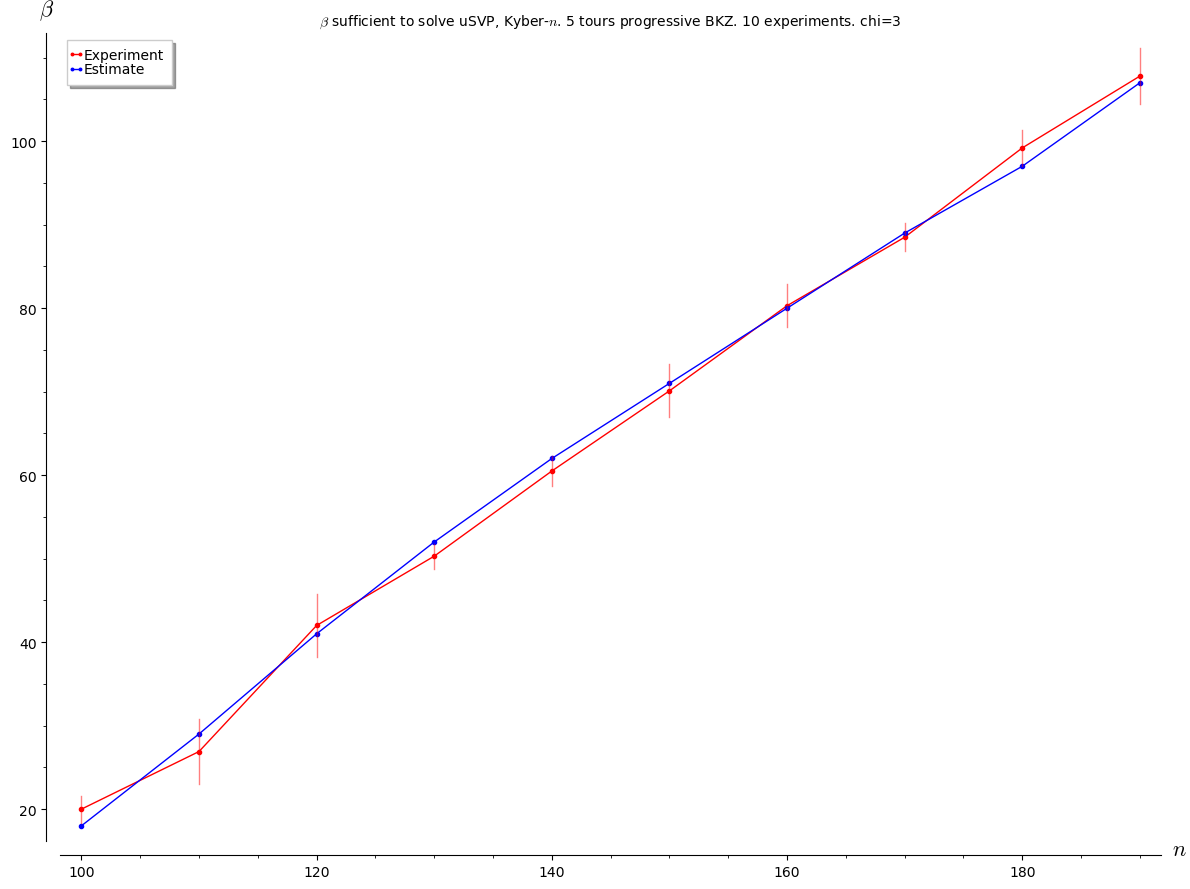

In [7]:
start, step, times = 100, 10, 10
l = {}
ddl = {} #{ start+step*i: 0 for i in range(times) }
for oo in o:
    if not oo["kyb"][0] in l.keys():
        l[oo["kyb"][0]] = [ oo["beta"], 1 ]
        ddl[oo["kyb"][0]] = [ oo["beta"] ]
    else:
        l[oo["kyb"][0]][0] += oo["beta"]
        l[oo["kyb"][0]][1] += 1
        ddl[oo["kyb"][0]].append( oo["beta"] )

for key in l.keys():
    l[key] = l[key][0]/l[key][1].n()
    ddl[key] = np.std(ddl[key])

print( l )
print( ddl )
chi = o[0]['kyb'][2]

predict3 = [(100,18),(110,29),(120,41),(130,52),(140,62),(150,71),(160,80),(170,89),(180,97),(190,107)]
predict2 = [(100,11),(110,21),(120,32),(130,44),(140,54),(150,63),(160,72),(170,80),(180,89),(190,97)]
P = list_plot(l, plotjoined=True, marker='.',color="red", legend_label="Experiment") + list_plot(predict3, plotjoined=True, marker='.', legend_label="Estimate")

for ii in range(times):
    i = start+step*ii
    P += plot( line( [(i,l[i]+ddl[i]),(i,l[i]-ddl[i])], color="red", alpha=0.5 ) )

P.show( axes_labels=['$n$', '$\\beta$'], title=f'$\\beta$ sufficient to solve uSVP, Kyber-$n$. 5 tours progressive BKZ. 10 experiments. chi={chi}', figsize=12 )

{100: 0.961146066101889, 110: 2.37581238956501, 120: 9.56190080622832, 130: 41.2928344621758, 140: 290.114965422116, 150: 741.778408947537, 160: 1724.46174306710, 170: 2780.55287712293, 180: 7224.33679197760, 190: 23186.9216435723}
3.20955712769657


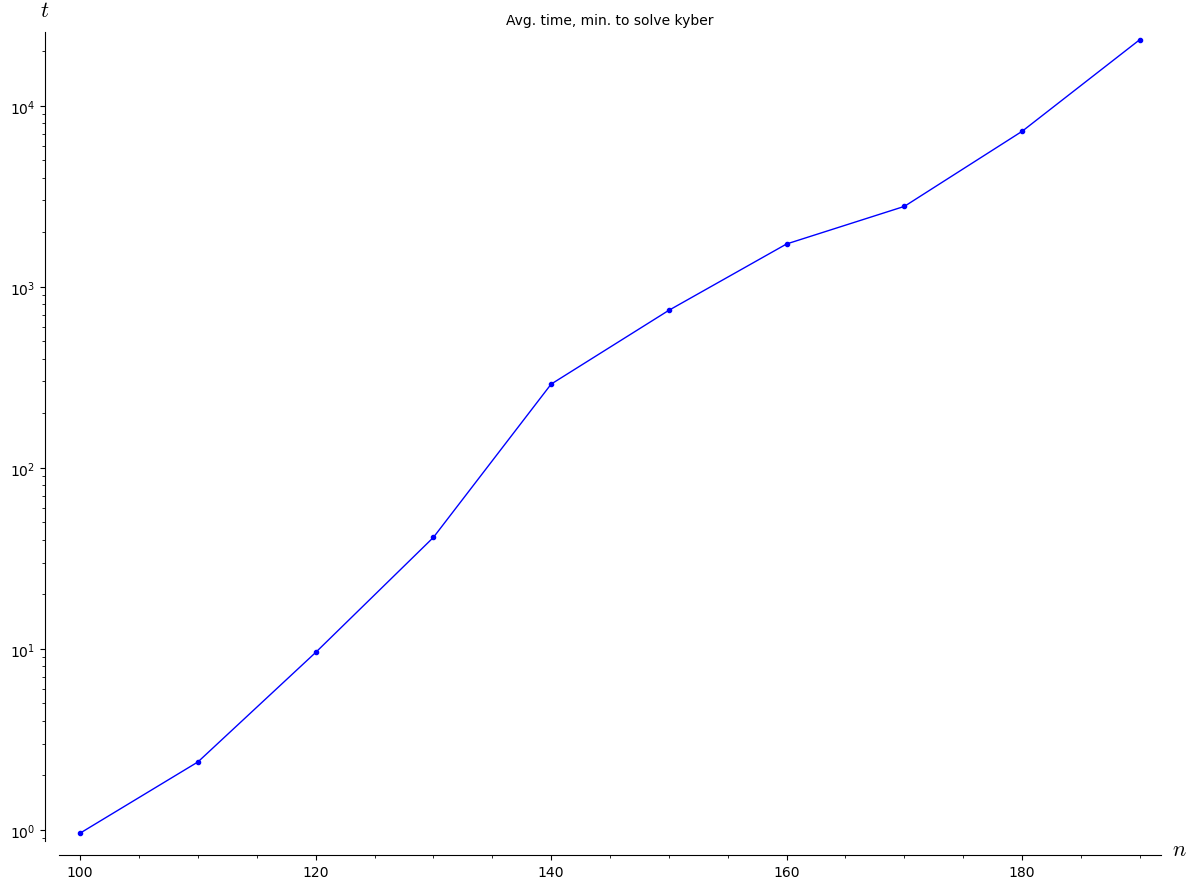

In [9]:
l = {}
for oo in o:
    if not oo["kyb"][0] in l.keys():
        l[oo["kyb"][0]] = [ oo["time"], 1 ]
    else:
        l[oo["kyb"][0]][0] += oo["time"]
        l[oo["kyb"][0]][1] += 1

for key in l.keys():
    l[key] = l[key][0]/l[key][1].n()/60

print(l)
print(l[190]/l[180])

list_plot_semilogy(l,plotjoined=True, marker=".",title="Avg. time, min. to solve kyber", axes_labels=['$n$', '$t$'], figsize=12)

{100: 1.3826631323744853, 110: 4.1426228698343035, 120: 16.730579826484124, 130: 61.026395269855854, 140: 590.7033932286005, 150: 995.2127826550975, 160: 2213.390042260243, 170: 3343.557889236727, 180: 10235.378998162581}
3.061223803275956


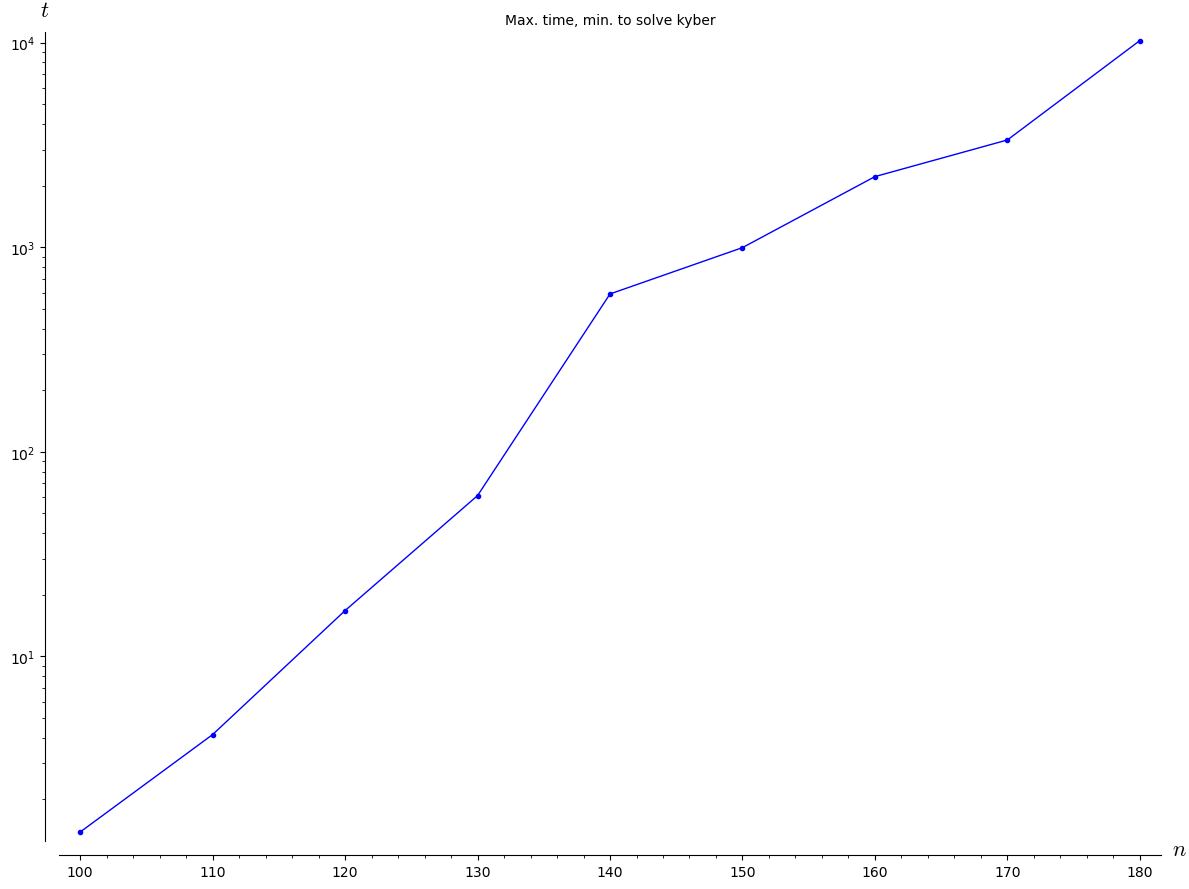

In [14]:
l = {}
for oo in o:
    if not oo["kyb"][0] in l.keys():
        l[oo["kyb"][0]] = l[oo["kyb"][0]] = [ oo["time"], 1 ]
    else:
        l[oo["kyb"][0]][0] = max( l[oo["kyb"][0]][0], oo["time"] )
        l[oo["kyb"][0]][1] += 1

for key in l.keys():
    l[key] = l[key][0]/60

print(l)
print(l[180]/l[170])

list_plot_semilogy(l,plotjoined=True, marker=".",title="Max. time, min. to solve kyber", axes_labels=['$n$', '$t$'], figsize=12)

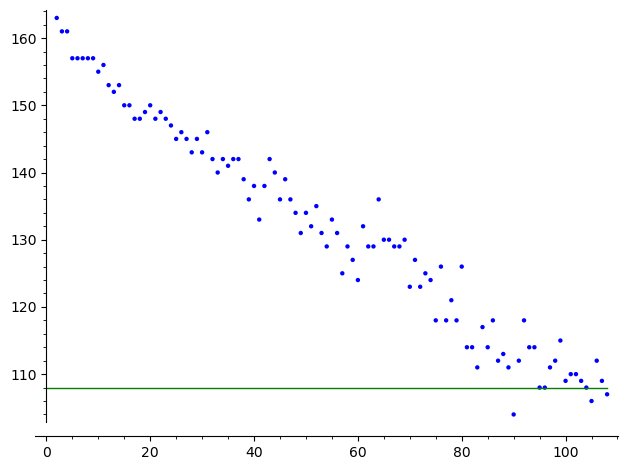

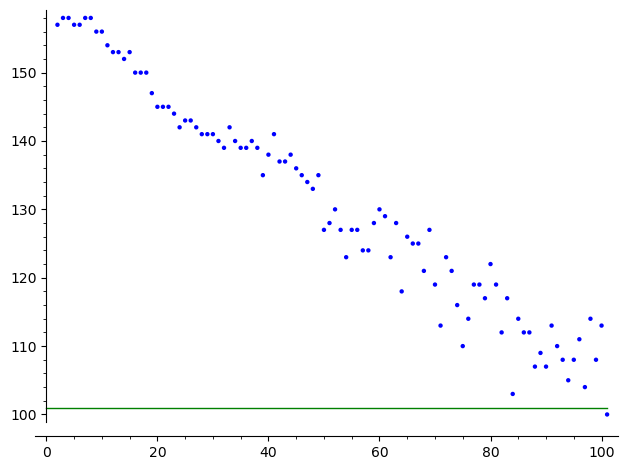

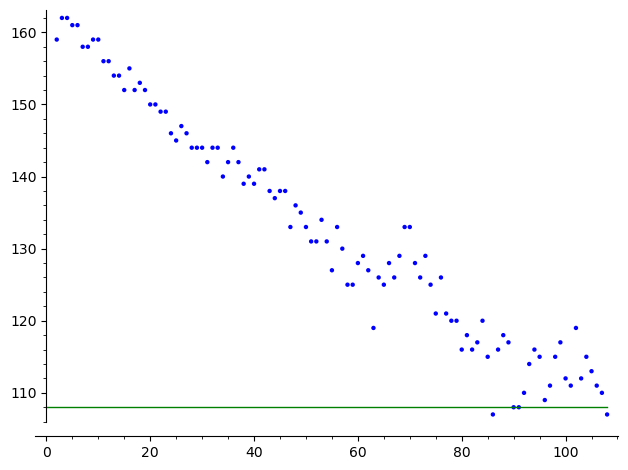

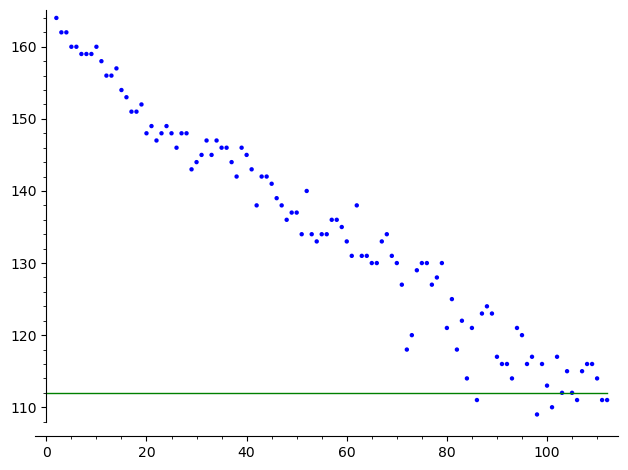

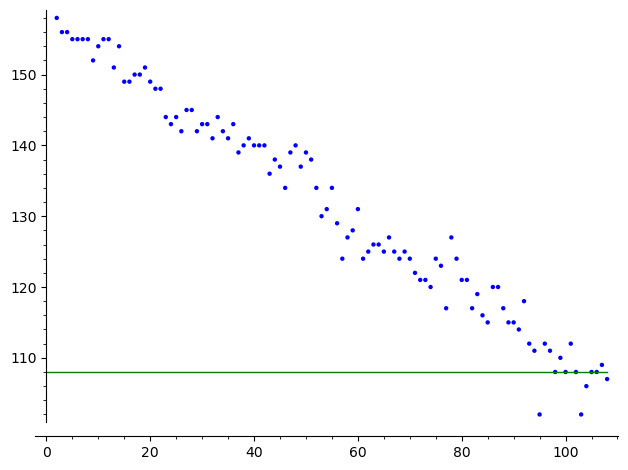

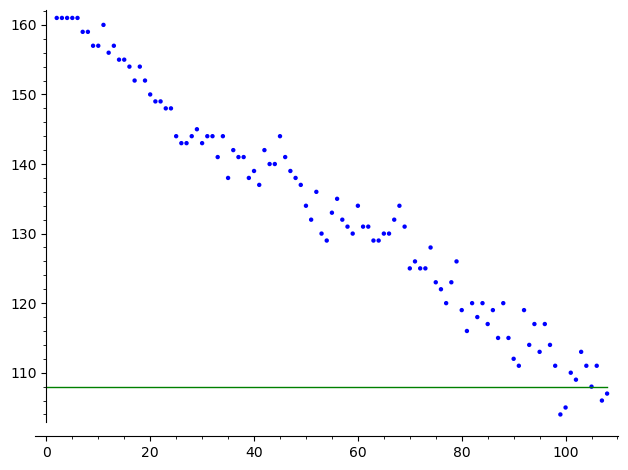

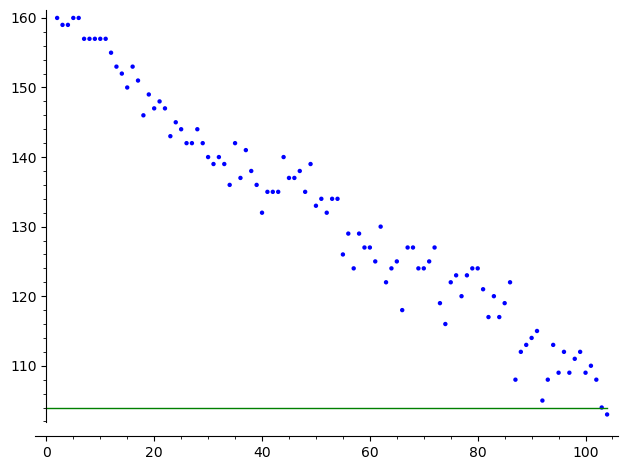

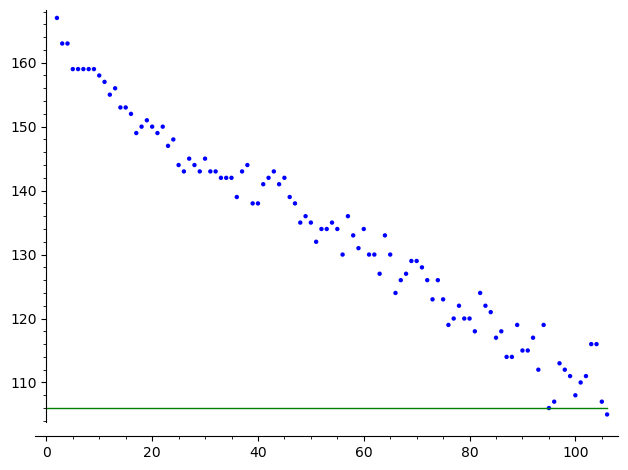

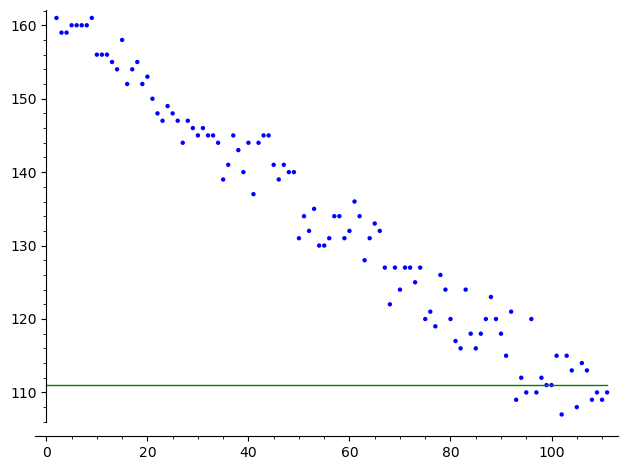

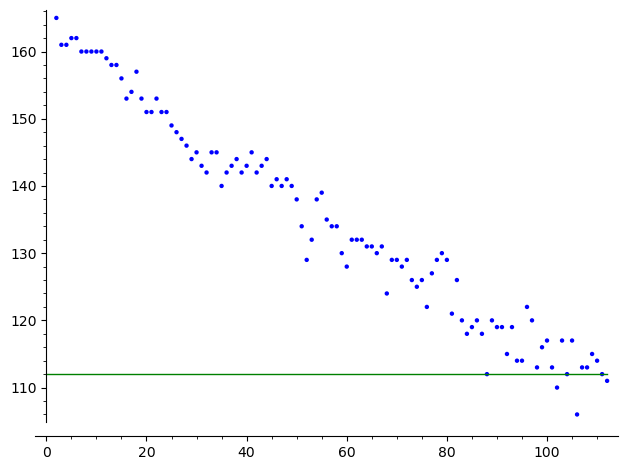

In [10]:
#projective lattice dimension dynamics. The green line's y-coordinate is the SKR blocksize.
for tmp in o[90:100]:
    l = []
    for key in tmp["projinfo"].keys():
        l.append( (key,tmp["projinfo"][key]["i"]) )
    
    ( list_plot(l) + line([(0,key),(key,key)], color="green") ).show()

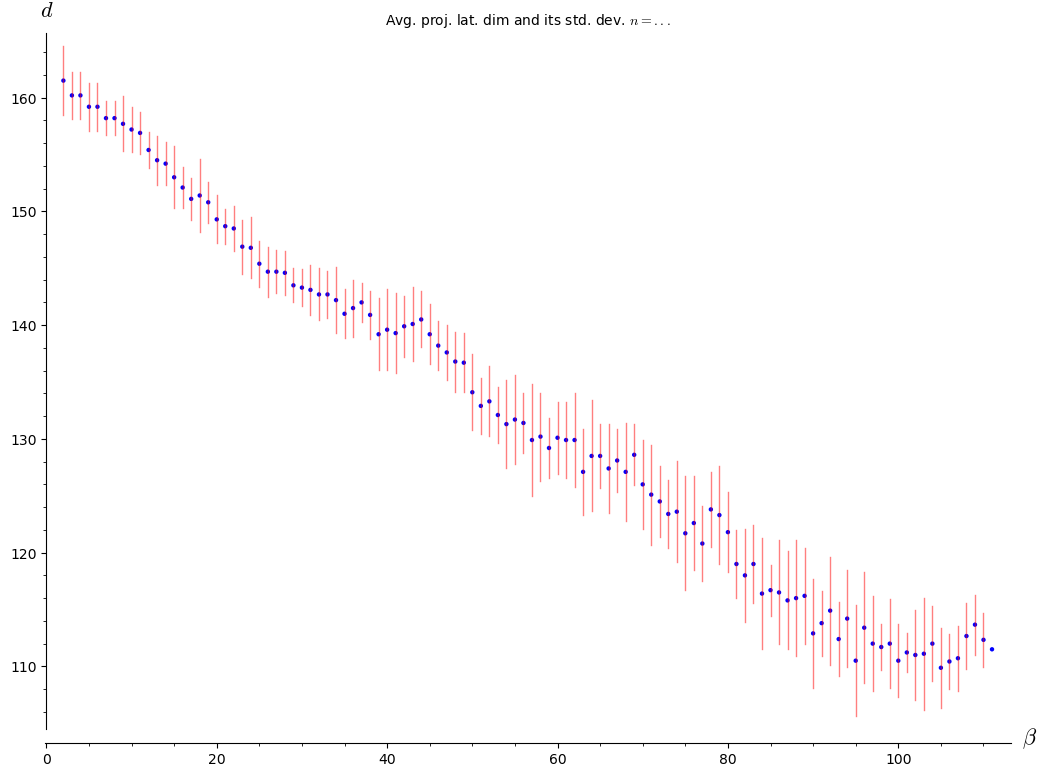

In [11]:
maxbeta =0
left, right = 90, 100
for oo in o[left:right]:
    if oo["beta"] > maxbeta:
        maxbeta = oo["beta"]

L = []
for tmp in o[left:right]:
    l = []
    for key in tmp["projinfo"].keys():
        l.append( (key,tmp["projinfo"][key]["i"]) )
    L.append( l )

v = { i: 0 for i in range(2,maxbeta) }
dv = { i: 0 for i in range(2,maxbeta) }
for ind in range(2,maxbeta):
    cntr = 0
    curr = 0
    ddv = []
    for l in L:
        # print(ind)
        if len(l)>ind-1:
            curr += l[ind-2][1]
            cntr += 1
            ddv.append( l[ind-2][1] )
    if cntr!=0:
        v[ind] = curr / cntr
        # dv[ind] = np.nanvar( ddv )
        dv[ind] = np.std( ddv )

vplot = list_plot( v )
# list_plot( v ) + list_plot([ ( i, v[i]+dv[i] ) for i in range(2,maxbeta-1) ], color = "red" ) 
for i in range(2,maxbeta-1):
    vplot += plot( line( [(i,v[i]+dv[i]),(i,v[i]-dv[i])], color="red", alpha=0.5 ) )

vplot.show(title="Avg. proj. lat. dim and its std. dev. $n=...$",axes_labels=["$\\beta$", "$d$"], figsize=10.5)